In [33]:
import os
import nibabel as nb
import nilearn
from nilearn import plotting
from nilearn import glm
import numpy as np
from nilearn import image

subjlevel_folder = '/scratch/hyruuk/neuromod/shinobi2023/processed/z_maps/subject-level'
mask_template = '/scratch/hyruuk/neuromod/shinobi2023/cneuromod.processed/smriprep/{}/anat/{}_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
annotations=['HIT', 'JUMP', 'Kill', 'HealthLoss']

In [3]:
def load_data(subjlevel_folder, annotations=['HIT', 'JUMP', 'Kill', 'HealthLoss']):
    data_dict = {'fpath_list': [],
                 'subject_list': [],
                 'annot_list': [],
                 'binarized_list': []}
    for annot in annotations:
        annot_folder = os.path.join(subjlevel_folder, annot)
        for file in os.listdir(annot_folder):
            fpath = os.path.join(annot_folder, file)
            data_dict['fpath_list'].append(fpath)
            thresholded_map = glm.threshold_stats_img(fpath, threshold=3)[0].get_data()
            binarized_map = np.where(thresholded_map != 0, 1, thresholded_map)
            data_dict['binarized_list'].append(binarized_map)
            data_dict['subject_list'].append(file.split('_')[0])
            data_dict['annot_list'].append(annot)
    return data_dict

data_dict = load_data(subjlevel_folder)


/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


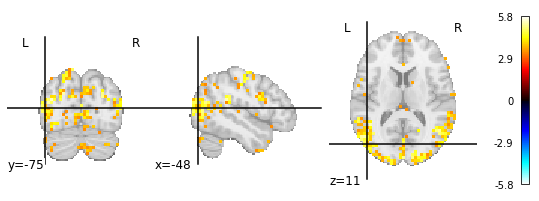

In [4]:
# Plot one map just to check
plotting.plot_stat_map(glm.threshold_stats_img(fpath_list[0], threshold=3)[0])

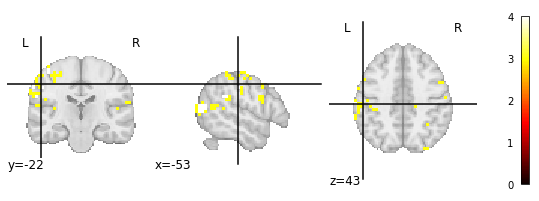

In [18]:
def get_top_voxels(data_dict, annot_to_plot):
#annot_to_plot = 'HIT'
    sublist = [data_dict['binarized_list'][idx] for idx, annot in enumerate(data_dict['annot_list']) if annot == annot_to_plot ]
    summed_image = image.new_img_like(nb.load(data_dict['fpath_list'][0]), 
                                      np.sum(np.stack(sublist), axis=0))
    top_voxels = image.threshold_img(summed_image, threshold=3)
    return top_voxels

top_voxels = get_top_voxels(data_dict, 'HIT')
plotting.plot_stat_map(top_voxels)

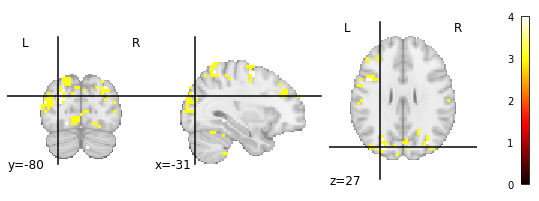

(<Figure size 288x324 with 5 Axes>,
 [<Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <Axes3DSubplot:>,
  <AxesSubplot:>])

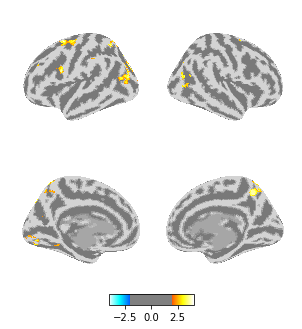

In [30]:


gs = 

for annot_to_plot in annotations:
    

plotting.plot_img_on_surf(
    top_voxels,
    views=["lateral", "medial"],
    hemispheres=["left", "right"],
    inflate=True,
    symmetric_cbar=False,
    threshold=2,
    output_file=None,
    title=None
)

/home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


array([0., 3., 4.])